In [1]:
#Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

In [2]:
aisles = pd.DataFrame.from_csv('aisles.csv', index_col=None)
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [3]:
orders = pd.DataFrame.from_csv('orders.csv', index_col=None)
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [4]:
products = pd.DataFrame.from_csv('products.csv', index_col=None)
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
prior_orders = pd.DataFrame.from_csv('order_products__prior.csv', index_col=None)
prior_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [6]:
departments = pd.DataFrame.from_csv('departments.csv', index_col=None)
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# Orders by day of week

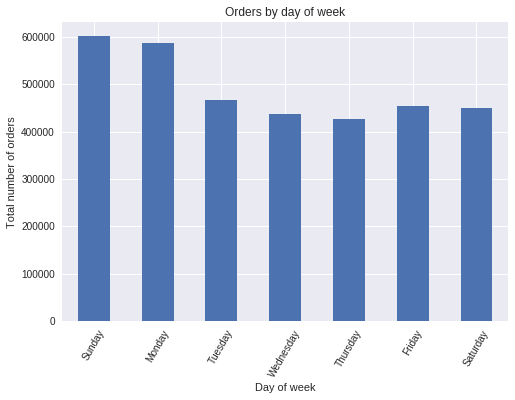

In [9]:
#Order day of week
orders_arr = orders
orders_dow = orders_arr.order_dow.value_counts()
orders_plot = orders_dow.sort_index().plot(kind='bar',title='Orders by day of week')
orders_plot.set_xlabel("Day of week")


orders_plot.set_ylabel("Total number of orders");

dow_map= {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',
              4:'Thursday', 5:'Friday', 6:'Saturday'}

orders_plot.set_xticklabels([dow_map[d] for d in orders_dow.sort_index().index],rotation=60);

Most customers seem to order groceries from Instacart on Sunday and Monday. The customers likely intended to stock up for the week. 

# Orders by hour of day

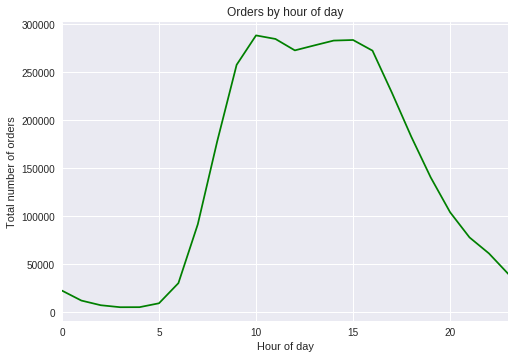

In [11]:
orders_arr = orders
orders_dow = orders_arr.order_hour_of_day.value_counts()
orders_plot = orders_dow.sort_index().plot(kind='line',title='Orders by hour of day',color='green');
orders_plot.set_xlabel("Hour of day");
orders_plot.set_ylabel("Total number of orders");
# orders_plot.set_xticklabels(orders_dow.sort_index().index,rotation=0)

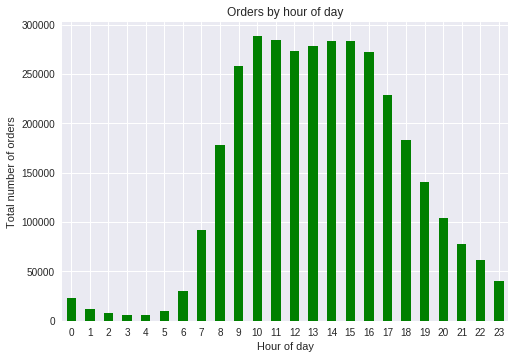

In [12]:
#Order hour of day bar graph
orders_plot = orders_dow.sort_index().plot(kind='bar',title='Orders by hour of day',color='green')
orders_plot.set_xlabel("Hour of day")
orders_plot.set_ylabel("Total number of orders")
orders_plot.set_xticklabels(orders_dow.sort_index().index,rotation=0);

Most of the orders are placed between 9 am- 4 pm with few orders placed early in the morning and late at night

# Days Since Prior Order

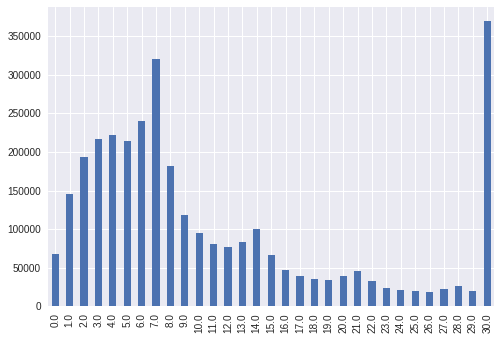

In [17]:
#Distribution of days since prior order
orders_copy = orders
orders_copy=orders_copy.days_since_prior_order.dropna()
orders_copy.value_counts().sort_index().plot(kind='bar');
# orders_copy=orders_copy.value_counts

Most customers seem to order a month or a week after their prior purchase. The distribution above shows that most customers preferred to order within 9 days of their previous order. This could possibly be because it doesn't make too much sense to stock up on produce for more than 10 days and thus the customers probably reordered at least the produce within 10 days, if not other categories of food. 

# First items added to cart

In [277]:
orders_copy = prior_orders
index =orders_copy.groupby(['order_id'])['add_to_cart_order'].transform(min) == orders_copy['add_to_cart_order']

In [278]:
orders_copy2 = orders_copy[index]
orders_copy2 = orders_copy2.groupby(['product_id']).agg({'add_to_cart_order':'sum'}).reset_index()
orders_copy2['ratio'] = orders_copy2['add_to_cart_order']/orders_copy2['add_to_cart_order'].sum()

In [279]:
orders_copy2 = orders_copy2['ratio'].sort_values(ascending=False).to_frame()

In [280]:
orders_copy2_temp = orders_copy2.reset_index()
orders_copy2_temp=orders_copy2_temp.rename(columns = {'index':'product_id'})

In [285]:
orders_copy2_temp = orders_copy2_temp.merge(products)
orders_copy2_temp = orders_copy2_temp.drop(['ratio','aisle_id','department_id'],axis=1)

In [288]:
orders_copy2_temp.head(6)

,product_id,product_name
0,20924,Oh Snap! Hottie Bites 3.4oz
1,11061,Garlic & Herb Jack Sliced Cheese
2,23445,Roast Chicken Flavor Ramen Noodle Soup
3,17774,Parmigiano Reggiano
4,39767,Rotisserie Seasoned Chicken Breast
5,18425,Royale Vanilla Dairy-Free Ice Cream


The first items added to the cart seems to be pretty unique items like ramen and cheese. It seems as if the first item customers pick are snacks or new items they want to indulge in as opposed to produce and dairy products. 

# Ten most re-ordered items

In [10]:
compiled_productDf = prior_orders
compiled_productDf = compiled_productDf.groupby(['product_id']).agg({'reordered':'mean'}).reset_index()

In [13]:
priorOrders_merge = compiled_productDf.merge(products)

In [14]:
priorOrders_merge.sort_values('reordered',ascending=False).head(10)

,product_id,reordered,product_name,aisle_id,department_id
6430,6433,0.941176,Raw Veggie Wrappers,13,20
2074,2075,0.931034,Serenity Ultimate Extrema Overnight Pads,126,11
43545,43553,0.923077,Orange Energy Shots,64,7
27734,27740,0.920792,Chocolate Love Bar,45,19
14605,14609,0.914286,Soy Powder Infant Formula,92,18
13871,13875,0.911111,Simply Sleep Nighttime Sleep Aid,6,2
39984,39992,0.909091,"Energy Shot, Grape Flavor",64,7
5865,5868,0.900000,Russian River Valley Reserve Pinot Noir,28,5
31412,31418,0.900000,Sparking Water,115,7
35598,35604,0.900000,Maca Buttercups,45,19


Raw veggie wrappers, energy shots and sanitary napkins seem to be the most re-ordered items. These items seem unique and it makes sense they are re-ordered from Instacart because it would be relatively tough to find them easily in other stores

# Ten most ordered items

In [39]:
most_ordered =prior_orders
most_ordered=most_ordered.groupby(['product_id']).size().sort_values(ascending=False).to_frame()

In [40]:
most_ordered = most_ordered.head(10).reset_index()
most_ordered = most_ordered.merge(products)
most_ordered_final = most_ordered[['product_name','aisle_id','department_id']]

In [41]:
most_ordered_final

,product_name,aisle_id,department_id
0,Banana,24,4
1,Bag of Organic Bananas,24,4
2,Organic Strawberries,24,4
3,Organic Baby Spinach,123,4
4,Organic Hass Avocado,24,4
5,Organic Avocado,24,4
6,Large Lemon,24,4
7,Strawberries,24,4
8,Limes,24,4
9,Organic Whole Milk,84,16


Bananas, Strawberries, Spinach and Avocado are ordered the most

# Department most popular amongst consumers?

In [14]:
prior_orders_copy = prior_orders
orders_products = prior_orders_copy.merge(products)

In [15]:
orders_depName = orders_products.merge(departments)

In [16]:
orders_depName['department'].value_counts().to_frame()

,department
produce,9479291
dairy eggs,5414016
snacks,2887550
beverages,2690129
frozen,2236432
pantry,1875577
bakery,1176787
canned goods,1068058
deli,1051249
dry goods pasta,866627


Produce, dairy and snacks are the most popular departments. Tying this back to how frequently people order, it seems that most people order weekly to buy produce and dairy items because they tend to expire faster than dry goods and personal care items

# For food ordered between 10 pm - 12 am, what's the most popular?

In [42]:
orders_copy = orders
order_hod = orders_copy.loc[orders_copy['order_hour_of_day'].isin([22,23,0])]
# order_hod.merge(prior_orders)

In [44]:
order_mergeTable = order_hod.merge(prior_orders)

In [45]:
order_mergeTable = order_mergeTable['product_id'].to_frame().merge(products)
order_mergeTable['product_name'].value_counts().head(10)

Banana                    17070
Bag of Organic Bananas    15366
Organic Strawberries      11241
Organic Baby Spinach      10094
Organic Hass Avocado       8282
Organic Avocado            6813
Organic Whole Milk         5903
Organic Raspberries        5805
Large Lemon                5710
Strawberries               5697
Name: product_name, dtype: int64

There doesn't seem to be a difference between the basket of goods that are ordered the most in general and the basket of goods ordered between 10 pm -12 am. I would assume that most people would order pizzas and wings at that hour instead of bananas. However, the result makes sense because people do not use Instacart for junk food/ late night indulgences. They use Instacart to make reasoned decisions about what groceries to order for the near future. 

# Correlation between number of items bought and the number of days since prior order

In [8]:
orders_copy = orders.dropna()
orders_copy_merge = orders_copy.merge(prior_orders)

In [9]:
orders_copy2_merge = orders_copy_merge
orders_copy_filter = orders_copy2_merge[['order_id', 'product_id','days_since_prior_order']]

In [10]:
temp = orders_copy_filter
temp = temp.groupby('order_id', sort=False)\
  .agg({'product_id': 'size','days_since_prior_order': 'min'})

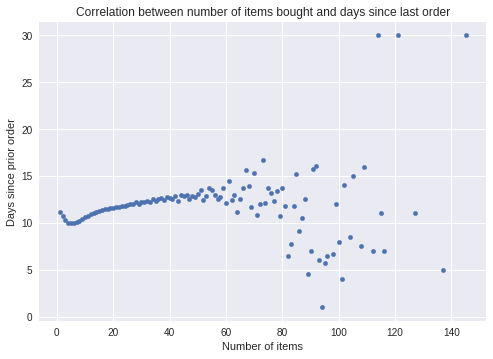

In [12]:
avg_orderCount = temp 
avg_orderCount = temp.groupby(['product_id'])\
    .agg({'days_since_prior_order':'mean'})

avg_orderCount = avg_orderCount.reset_index()
plot_scatter = avg_orderCount.plot(x='product_id', y='days_since_prior_order', title ='Correlation between number of items bought and days since last order',kind='scatter');
plot_scatter.set_xlabel("Number of items");
plot_scatter.set_ylabel("Days since prior order");

My hypothesis is that people who do not order often order a lot when they actually end up ordering. Thus, I assumed that people who haven't shopped in Instacart for 20 days would buy more things than people who bought items a day or two ago. The scatter plot above does not show a clear correlation, even though there seems to be a slight positive slope in the direction I expected. 

# For each department, what are the top 5 products?

In [14]:
products_copy = products
prior_orders_copy = prior_orders
merge_arr = prior_orders_copy.merge(products)

In [127]:
merge_arr_temp = merge_arr[['department_id','product_id']]

In [191]:
merge_arr_temp2 = merge_arr_temp.groupby(['department_id','product_id']).size().to_frame().reset_index()

In [192]:
index = merge_arr_temp2.groupby(['department_id'])[0].transform(max) ==merge_arr_temp2[0]
merge_arr_temp2 = merge_arr_temp2[index]
merge_arr_temp2 = merge_arr_temp2.drop(0,axis=1)
merge_arr_temp2 = merge_arr_temp2.merge(products)
merge_arr_temp2 = merge_arr_temp2.merge(departments)

In [194]:
merge_arr_temp2 = merge_arr_temp2.drop(['department_id','product_id','aisle_id'],axis=1)

In [195]:
merge_arr_temp2

,product_name,department
0,Blueberries,frozen
1,Roasted Almond Butter,other
2,100% Whole Wheat Bread,bakery
3,Banana,produce
4,Sauvignon Blanc,alcohol
5,Organic Sea Salt Roasted Seaweed Snacks,international
6,Sparkling Water Grapefruit,beverages
7,Grain Free Chicken Formula Cat Food,pets
8,Marinara Sauce,dry goods pasta
9,Dried Mango,bulk


The dataframe above shows the most popular product in each department. Banana, as expected is the most popular item in the produce section while Chicken breast is the most popular in the meat and seafood department. 